<a href="https://colab.research.google.com/github/srinivasanibmbangalore/Deep-Learning2/blob/Version-1/Keras_Full_Dense_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [0]:
batch_size=128
epochs=20
num_classes=10

In [19]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
print(x_train[0][1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/= 255
x_test/= 255


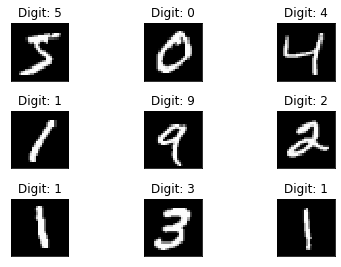

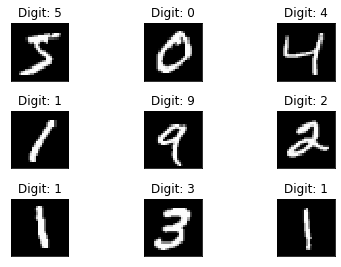

In [20]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

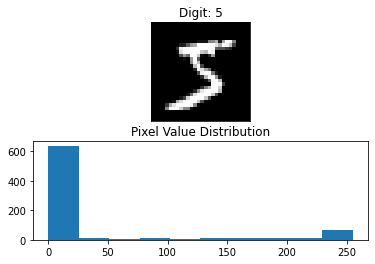

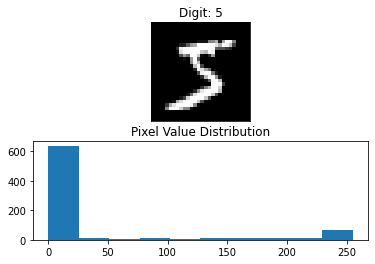

In [22]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [11]:
#y_train=to_categorical(y_train,num_classes)
#y_test=to_categorical(y_test,num_classes)
print("Before shape is ",y_train.shape)
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_train.shape

Before shape is  (60000,)


(60000, 10)

In [0]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))

In [13]:
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test)
print("Test Loss:",score[0])
print("Test Accuracy",score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 130us/step - loss: 1.2180 - accuracy: 0.6888 - val_loss: 0.5431 - val_accuracy: 0.8661
Epoch 2/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.5306 - accuracy: 0.8507 - val_loss: 0.3738 - val_accuracy: 0.8989
Epoch 3/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.4222 - accuracy: 0.8794 - val_loss: 0.3208 - val_accuracy: 0.9098
Epoch 4/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.3732 - accuracy: 0.8928 - val_loss: 0.2920 - val_accuracy: 0.9173
Epoch 5/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.3401 - accuracy: 0.9006 - val_loss: 0.2702 - val_accuracy: 0.9224
Epoch 6/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.3182 - accuracy: 0.9074 - val_loss: 0.2531 - val_accuracy: 0.9288
Epoch 7/20
60000/60000 [==============================] - 7s 1